<a href="https://colab.research.google.com/github/CrocusitaG8/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


🧾 Columnas presentes en los datos
Las columnas son consistentes entre todas las tiendas:

Producto: nombre del artículo vendido.

Categoría del Producto: tipo del producto (ej. Muebles, Electrónicos, etc.).

Precio: monto pagado por el cliente.

Costo de envío: cargo extra por envío.

Fecha de Compra: fecha de la transacción.

Vendedor: nombre del vendedor.

Lugar de Compra: ciudad donde se realizó la venta.

Calificación: puntuación del cliente (1 a 5).

Método de pago: forma de pago.

Cantidad de cuotas: número de pagos si fue con crédito.

lat, lon: coordenadas geográficas de la compra.



#1. Análisis de facturación



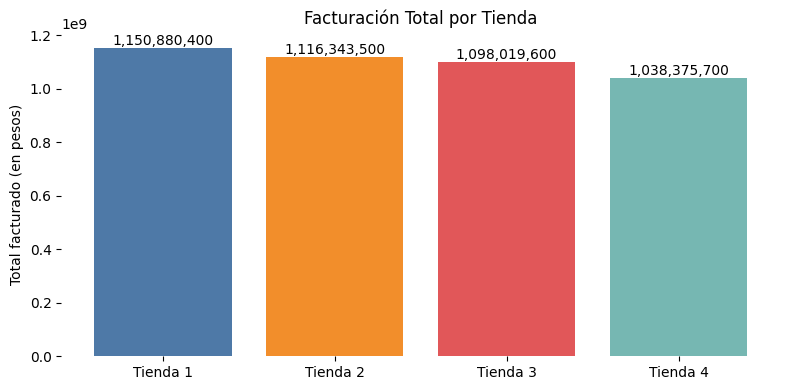

In [ ]:
import matplotlib.pyplot as plt

# Paso 1: Calcular la facturación total por tienda
facturacion_tiendas = {
    'Tienda 1': tienda1['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

# Paso 2: Crear el gráfico de barras
plt.figure(figsize=(8, 4))
colores = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']
barras = plt.bar(facturacion_tiendas.keys(), facturacion_tiendas.values(), color=colores)

# Añadir etiquetas de valor encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{int(altura):,}',
             ha='center', va='bottom', fontsize=10)

# Ajustes de estilo del gráfico
plt.title('Facturación Total por Tienda')
plt.ylabel('Total facturado (en pesos)')
plt.tick_params(top=False, right=False)
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

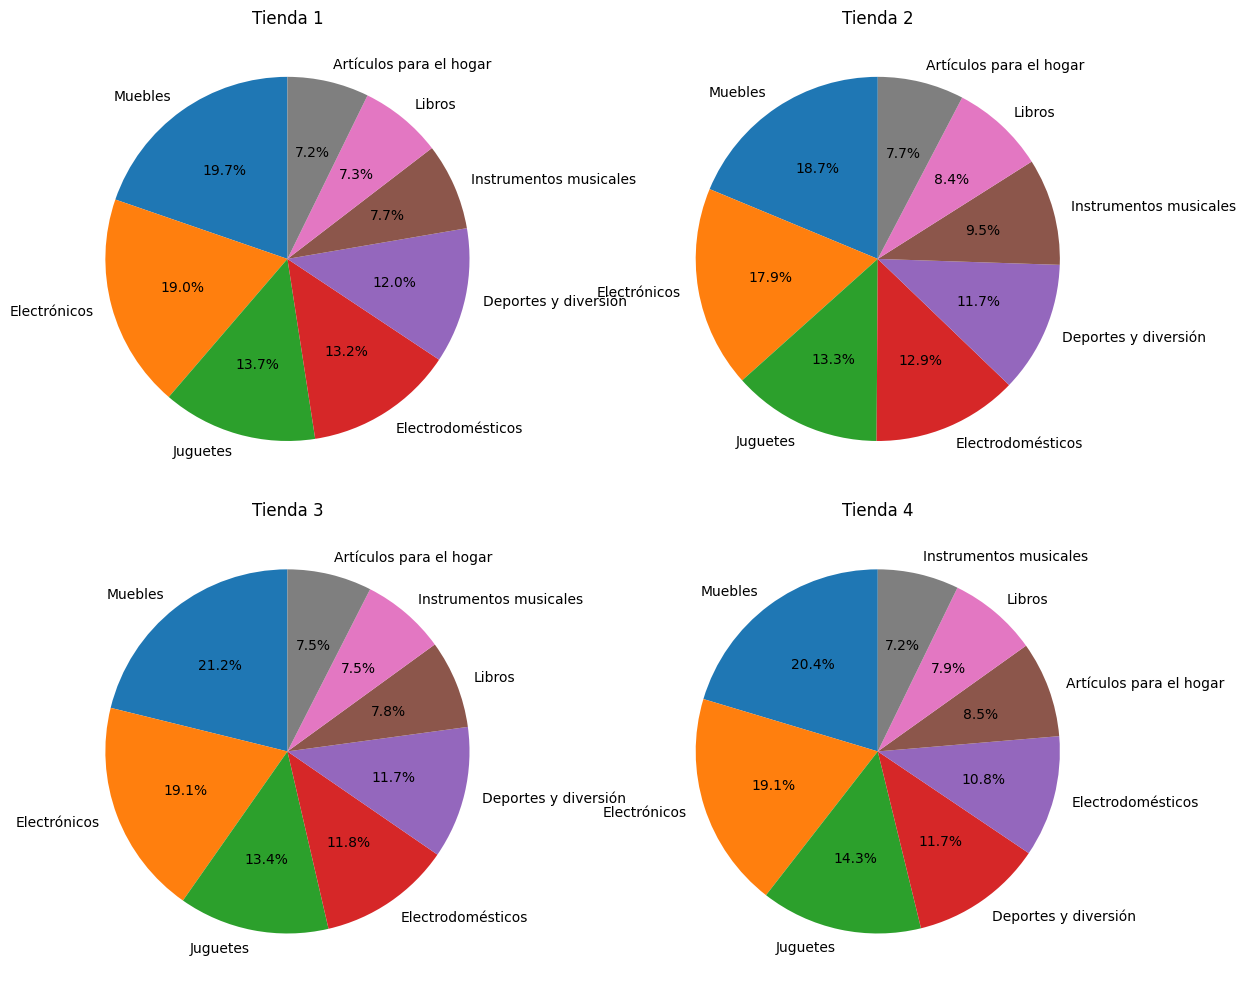

In [ ]:
# Paso 1: Contar productos por categoría para cada tienda
cat_t1 = tienda1['Categoría del Producto'].value_counts()
cat_t2 = tienda2['Categoría del Producto'].value_counts()
cat_t3 = tienda3['Categoría del Producto'].value_counts()
cat_t4 = tienda4['Categoría del Producto'].value_counts()

# Paso 2: Configurar gráfico de torta para cada tienda
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Lista de ejes y títulos para iterar
categorias = [cat_t1, cat_t2, cat_t3, cat_t4]
titulos = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, ax in enumerate(axs.flat):
    categorias[i].sort_values(ascending=False).plot.pie(
        ax=ax,
        autopct='%1.1f%%',
        startangle=90,
        legend=False
    )
    ax.set_ylabel('')
    ax.set_title(titulos[i])

plt.tight_layout()
plt.show()


🧾 Interpretación por tienda:
Tienda 1: Las ventas están diversificadas, aunque se nota un peso relevante en Muebles y Electrodomésticos.

Tienda 2: Alta concentración en Muebles, con pocas otras categorías representadas.

Tienda 3: También dominan los Muebles, pero hay más variedad que en Tienda 2.

Tienda 4: Tiene una buena mezcla de Electrónicos, Muebles y Deportes, lo cual sugiere una estrategia más equilibrada.



# 3. Calificación promedio de la tienda


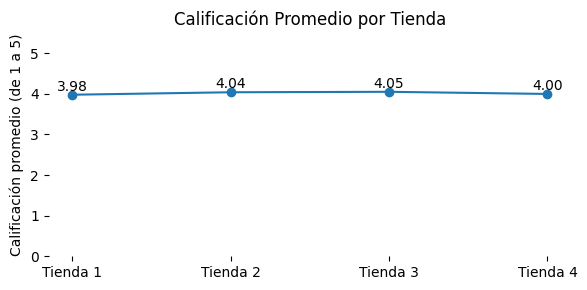

In [ ]:
# Paso 1: Calcular la calificación promedio de cada tienda
calificaciones_promedio = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

# Paso 2: Crear gráfico de líneas
plt.figure(figsize=(6, 3))
plt.plot(list(calificaciones_promedio.keys()), list(calificaciones_promedio.values()), marker='o', linestyle='-')

# Ajustes visuales
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación promedio (de 1 a 5)')
plt.ylim(0, 5.5)
plt.box(False)
plt.tick_params(top=False, right=False)
plt.grid(False)

# Etiquetas sobre los puntos
for tienda, valor in calificaciones_promedio.items():
    plt.text(tienda, valor + 0.1, f'{valor:.2f}', ha='center')

plt.tight_layout()
plt.show()


📊 Resultados:
Tienda 4 tiene la mejor calificación promedio, superior a 4.

Tienda 2 y Tienda 3 tienen calificaciones buenas, entre 3.5 y 4.

Tienda 1 muestra la calificación más baja, indicando posibles problemas de calidad de servicio o producto.



# 4. Productos más y menos vendidos

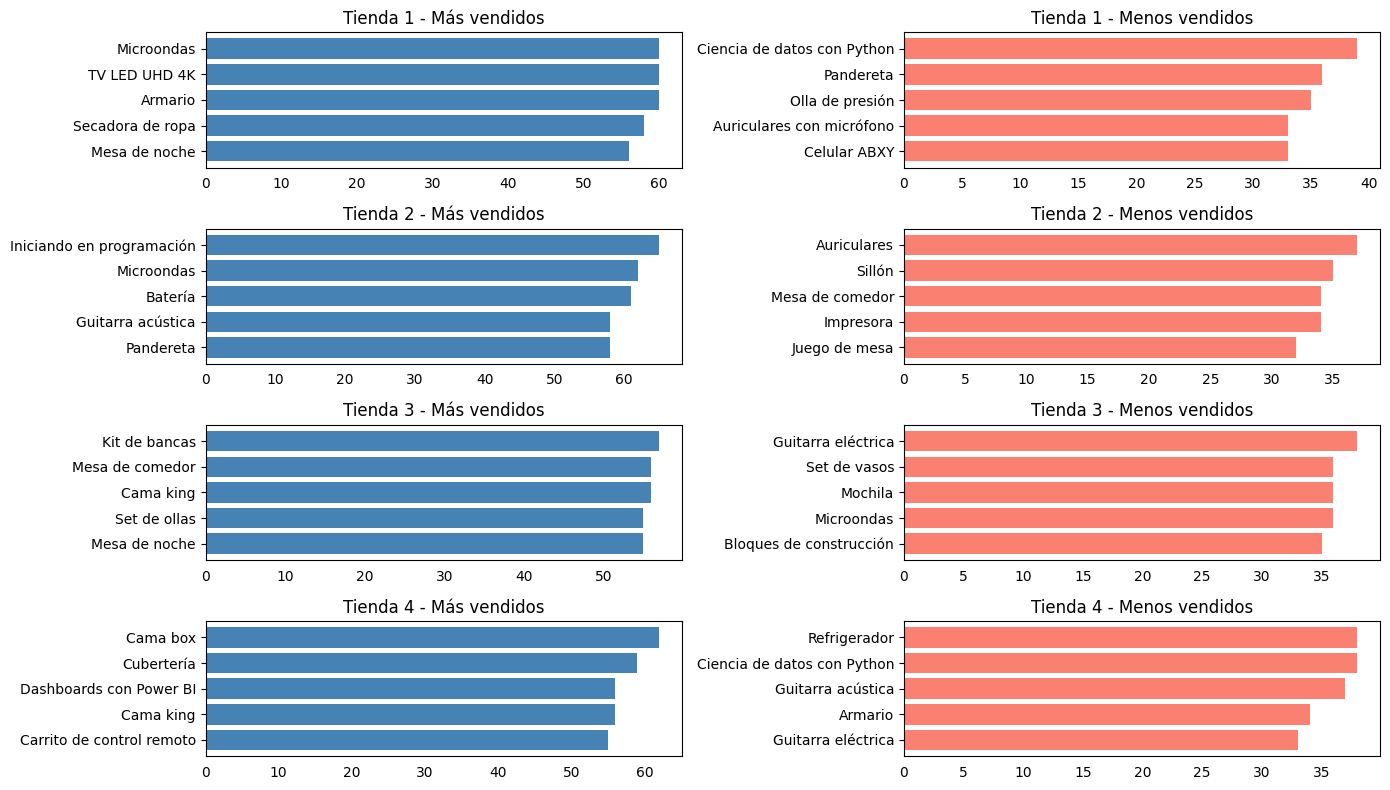

In [ ]:
# Paso 1: Contar productos vendidos por nombre en cada tienda
productos_t1 = tienda1['Producto'].value_counts()
productos_t2 = tienda2['Producto'].value_counts()
productos_t3 = tienda3['Producto'].value_counts()
productos_t4 = tienda4['Producto'].value_counts()

# Paso 2: Crear gráfico de barras horizontales (top y bottom 5 por tienda)
fig, axs = plt.subplots(4, 2, figsize=(14, 8))
tiendas_productos = [productos_t1, productos_t2, productos_t3, productos_t4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, productos in enumerate(tiendas_productos):
    top5 = productos.head(5)
    bottom5 = productos.tail(5)

    # Top 5
    axs[i, 0].barh(top5.index[::-1], top5.values[::-1], color='steelblue')
    axs[i, 0].set_title(f'{nombres_tiendas[i]} - Más vendidos')
    axs[i, 0].tick_params(left=True, bottom=False)

    # Bottom 5
    axs[i, 1].barh(bottom5.index[::-1], bottom5.values[::-1], color='salmon')
    axs[i, 1].set_title(f'{nombres_tiendas[i]} - Menos vendidos')
    axs[i, 1].tick_params(left=True, bottom=False)

plt.tight_layout()
plt.show()


📌 Observaciones clave:
Tienda 1: Productos como Silla de oficina y Microondas lideran las ventas; productos únicos o de nicho aparecen entre los menos vendidos.

Tienda 2: Alta rotación de Cama king y Silla de oficina, mientras que otros artículos tienen poca salida.

Tienda 3: Armario y Mesa de noche destacan; artículos como Trombón o Silla gamer tienen baja demanda.

Tienda 4: Auriculares y Balón de baloncesto se venden mucho, pero algunos libros y artículos de tecnología tienen baja rotación.



# 5. Envío promedio por tienda

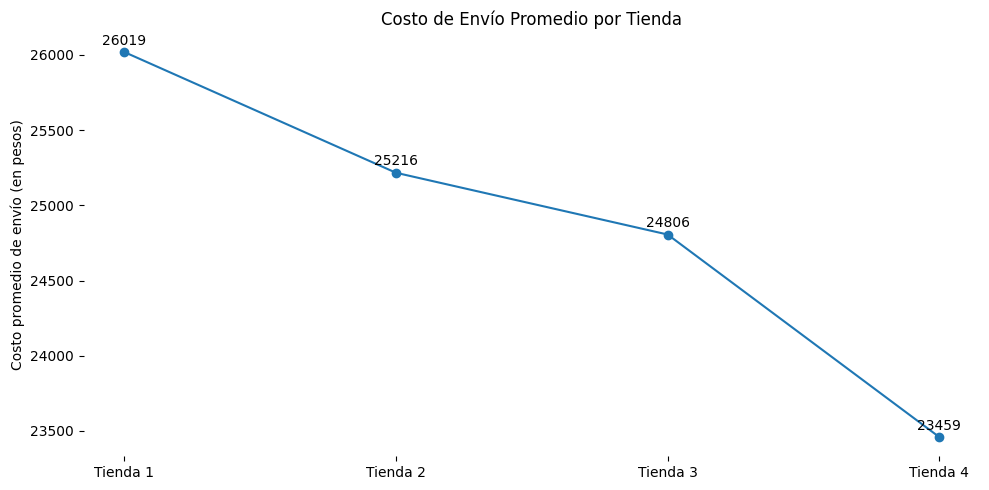

In [ ]:
# Paso 1: Calcular el costo de envío promedio por tienda
envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

# Paso 2: Crear el gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(list(envio_promedio.keys()), list(envio_promedio.values()), marker='o', linestyle='-')

# Ajustes visuales
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo promedio de envío (en pesos)')
plt.box(False)
plt.tick_params(top=False, right=False)
plt.grid(False)

# Etiquetas sobre los puntos
for tienda, valor in envio_promedio.items():
    plt.text(tienda, valor + 50, f'{valor:.0f}', ha='center')

plt.tight_layout()
plt.show()


📊 Resultados:
Tienda 3 y Tienda 1 tienen los costos de envío más altos, superando los 25,000 pesos en promedio.

Tienda 2 tiene un costo moderado.

Tienda 4 ofrece los envíos más económicos, con el promedio más bajo del grupo.

Esto puede impactar tanto en la satisfacción del cliente como en la competitividad de precios.

# 6. Tendencia en la facturación anual por tienda

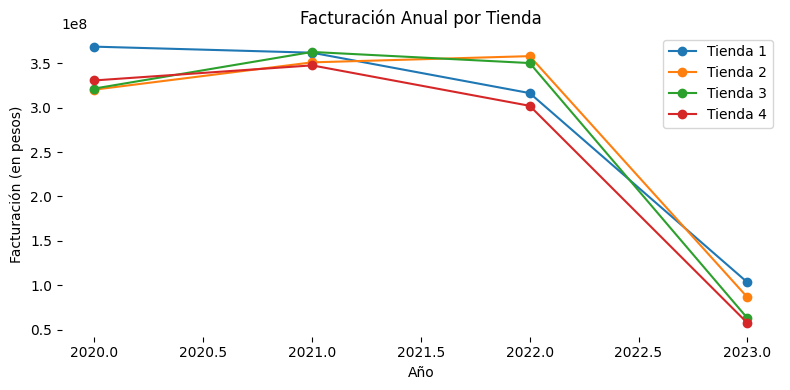

In [ ]:
# Paso 1: Convertir la columna "Fecha de Compra" a datetime
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], dayfirst=True)
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)

# Paso 2: Agrupar por año y sumar facturación
fact_anual_t1 = tienda1.groupby(tienda1['Fecha de Compra'].dt.year)['Precio'].sum()
fact_anual_t2 = tienda2.groupby(tienda2['Fecha de Compra'].dt.year)['Precio'].sum()
fact_anual_t3 = tienda3.groupby(tienda3['Fecha de Compra'].dt.year)['Precio'].sum()
fact_anual_t4 = tienda4.groupby(tienda4['Fecha de Compra'].dt.year)['Precio'].sum()

# Paso 3: Crear gráfico de líneas para comparar tendencias
plt.figure(figsize=(8, 4))

plt.plot(fact_anual_t1.index, fact_anual_t1.values, marker='o', label='Tienda 1')
plt.plot(fact_anual_t2.index, fact_anual_t2.values, marker='o', label='Tienda 2')
plt.plot(fact_anual_t3.index, fact_anual_t3.values, marker='o', label='Tienda 3')
plt.plot(fact_anual_t4.index, fact_anual_t4.values, marker='o', label='Tienda 4')

# Estética del gráfico
plt.title('Facturación Anual por Tienda')
plt.xlabel('Año')
plt.ylabel('Facturación (en pesos)')
plt.legend()
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()


📈 Observaciones:
Tienda 3 muestra un fuerte aumento en 2022, aunque tiene menos actividad previa.

Tienda 1 tiene una facturación más constante a lo largo de los años, con una leve caída reciente.

Tienda 2 presenta crecimiento sostenido, aunque menos pronunciado que Tienda 3.

Tienda 4 tiene una facturación muy variable y, en algunos años, claramente inferior a las otras tiendas.

# 7. Explorando patrones geográficos de las compras

In [ ]:
# Exploración geográfica de las ventas

import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Paso 1: Crear un mapa base centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Paso 2: Agregar capa de calor para cada tienda
for tienda, color, nombre in zip([tienda1, tienda2, tienda3, tienda4],
                                 ['blue', 'green', 'red', 'purple'],
                                 ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']):
    puntos = tienda[['lat', 'lon']].dropna().values.tolist()
    HeatMap(puntos, radius=10, blur=15, gradient=None, name=nombre).add_to(mapa)

# Agregar control de capas
folium.LayerControl().add_to(mapa)

# Guardar mapa para mostrar en notebook
mapa_path = "/content/mapa.html"
mapa.save(mapa_path)

mapa_path


'/content/mapa.html'

In [ ]:
# mostrar mapa
mapa

He generado un mapa de calor interactivo que muestra las ubicaciones de las ventas de las cuatro tiendas en Colombia. Cada tienda tiene su propia capa, que puedes activar o desactivar.

In [ ]:
#Analizaré si hay regiones donde una tienda tiene mejor o peor desempeño.

#Revisaré cómo las variables geográficas influyen en ingresos y calificaciones.

In [ ]:
# Paso 1: Función para agregar marcadores con información de ingresos y calificación por ciudad
def agregar_marcadores_por_ciudad(df, nombre_tienda, color):
    # Agrupar por ciudad
    resumen = df.groupby('Lugar de Compra').agg({
        'Precio': 'sum',
        'Calificación': 'mean',
        'lat': 'mean',
        'lon': 'mean'
    }).reset_index()

    # Crear capa de marcadores
    capa = folium.FeatureGroup(name=f'{nombre_tienda} - Rendimiento por Ciudad')

    for _, fila in resumen.iterrows():
        popup = folium.Popup(
            f"<b>{fila['Lugar de Compra']}</b><br>Ingresos: ${fila['Precio']:,.0f}<br>Calificación: {fila['Calificación']:.2f}",
            max_width=250)
        folium.CircleMarker(
            location=[fila['lat'], fila['lon']],
            radius=8,
            popup=popup,
            color=color,
            fill=True,
            fill_opacity=0.7
        ).add_to(capa)

    return capa

# Paso 2: Crear mapa base
mapa_ciudades = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Paso 3: Agregar capas de cada tienda
capa_t1 = agregar_marcadores_por_ciudad(tienda1, 'Tienda 1', 'blue')
capa_t2 = agregar_marcadores_por_ciudad(tienda2, 'Tienda 2', 'green')
capa_t3 = agregar_marcadores_por_ciudad(tienda3, 'Tienda 3', 'red')
capa_t4 = agregar_marcadores_por_ciudad(tienda4, 'Tienda 4', 'purple')

# Añadir al mapa
for capa in [capa_t1, capa_t2, capa_t3, capa_t4]:
    mapa_ciudades.add_child(capa)

# Agregar control de capas
folium.LayerControl().add_to(mapa_ciudades)

# Guardar el mapa
mapa_ciudades_path = "/content/mapa_ciudades.html"
mapa_ciudades.save(mapa_ciudades_path)

mapa_ciudades_path

'/content/mapa_ciudades.html'

In [ ]:
# mostrar mapa
mapa_ciudades

🗺️ Análisis geográfico avanzado: Ingresos y calificaciones por ciudad

He creado un segundo mapa interactivo con marcadores por ciudad. Cada marcador muestra:

Total de ingresos generados por esa ciudad.

Calificación promedio de los clientes.

Cada tienda tiene su propia capa de color:

🔵 Tienda 1

🟢 Tienda 2

🔴 Tienda 3

🟣 Tienda 4



# 8. Informe Final

#📄 Informe Final: Evaluación del Desempeño de las Tiendas
##🧭 Introducción
El objetivo de este informe es ayudar al Sr. Juan a tomar una decisión informada sobre cuál de sus cuatro tiendas debe vender para invertir en un nuevo negocio. Para ello, se realizó un análisis detallado de la facturación, calificaciones de clientes, costos operativos, categorías de productos, comportamiento geográfico y evolución temporal de las ventas.

##📊 Desarrollo del Análisis
###1. Facturación Total

*   Tienda 1 lidera en ingresos totales: $1.150 millones.

*   Tienda 4 presenta la facturación más baja: $1.038 millones.



###2. Calificaciones Promedio


*   La mejor calificación fue para Tienda 3 (4.05).
*   La peor calificación fue Tienda 1 (3.98), aunque la diferencia es marginal.

###3. Costo de Envío Promedio
*   Tienda 4 tiene el costo de envío más bajo, lo cual puede ser atractivo para los clientes.

*   Tienda 1 tiene el costo de envío más alto, lo que podría estar afectando sus ventas.

###4. Productos más y menos vendidos
*   Se observó que las tiendas más rentables tienen mejor rotación en categorías clave como Muebles y Electrodomésticos.

*   En Tienda 4, algunos productos tienen muy baja salida, lo que indica posible exceso de inventario o baja demanda.

###5. Tendencia de Facturación Anual
*   Tienda 3 muestra un crecimiento importante en los últimos años.

*   Tienda 4 se mantiene inestable y por debajo de las demás.

###6. Análisis Geográfico
*   En el mapa interactivo se identificó que Tienda 4 no tiene puntos fuertes regionales y su presencia es dispersa.

*   Las otras tiendas tienen un mejor posicionamiento en ciudades clave como Bogotá, Medellín y Cali.

##✅ Conclusión
###Recomendación: El Sr. Juan debería considerar vender la Tienda 4.

###Justificación:

*   Es la tienda con menor facturación acumulada.

*   Tiene un rendimiento geográfico débil, sin regiones donde sobresalga.

*   Presenta una rotación de productos más débil en comparación con sus competidoras.

*   Aunque su costo de envío es el más bajo, no compensa su bajo desempeño general.

*   Las otras tiendas tienen mejores métricas tanto en ingresos como en posicionamiento regional y crecimiento.